In [37]:
from scipy.io import wavfile
import json
import numpy as np
from matplotlib import pyplot as plt
from extract_fundamental_freq import extract_fundamental_freq
import os
from scipy.fftpack import fft

In [52]:
init_path = 'timbre_wav_files/'
f_names = os.listdir(init_path)
harmonics = {}
for instrument_file_name in f_names:
    fs, data = wavfile.read(init_path + instrument_file_name)
    data = np.array(data)
    if len(data.shape) > 1:
        data = data[:, 0]
    n_samples = 8192
    spectrum_sample_width = n_samples // 2
    freq_ratio = fs / spectrum_sample_width
    data = data[:n_samples]
    #extracting_fundamental
    fundamental_freq = extract_fundamental_freq(data, fs)
    data_fft = fft(data)
    fft_data_halved = np.array(data_fft[:len(data_fft) // 2])
    amplitude_spectrum = np.abs(fft_data_halved)
    phase_spectrum = np.angle(fft_data_halved)
    
    fundamental_idx = int(fundamental_freq // freq_ratio)
    harmonics_nums = np.arange(1, 20)
    harmonic_idxs = harmonics_nums * fundamental_idx
    
    harmonic_amplitudes = amplitude_spectrum[harmonic_idxs]
    harmonic_phases = phase_spectrum[harmonic_idxs]
    
    harmonic_coefficients = np.concatenate((
        harmonic_amplitudes, harmonic_phases), axis = 0).tolist()
    
    instrument_name = instrument_file_name.replace('.wav', '')
    harmonics[instrument_name] = harmonic_coefficients
    
    

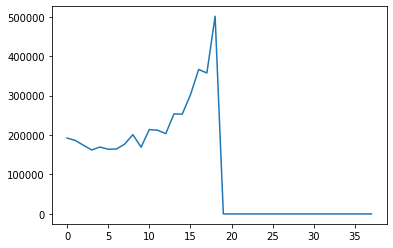

In [53]:
plt.plot(harmonics['saxophone'])

In [54]:
with open('harmonics.json', 'w') as fp:
    json.dump(harmonics, fp)